In [20]:
 pip install keras-vggface

Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install keras_applications==1.0.4 --no-deps

Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install keras_preprocessing==1.0.2 --no-deps

  Using cached Keras_Preprocessing-1.0.2-py2.py3-none-any.whl (26 kB)
  Attempting uninstall: keras-preprocessing
    Found existing installation: Keras-Preprocessing 1.1.2
    Uninstalling Keras-Preprocessing-1.1.2:
      Successfully uninstalled Keras-Preprocessing-1.1.2
Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install tensorflow

  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Attempting uninstall: keras-preprocessing
    Found existing installation: Keras-Preprocessing 1.0.2
    Uninstalling Keras-Preprocessing-1.0.2:
      Successfully uninstalled Keras-Preprocessing-1.0.2
Note: you may need to restart the kernel to use updated packages.


In [24]:
import keras
import glob
import random as rn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np


import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import operator
import tensorflow as tf
import random
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model


import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from keras.models import load_model
import numpy as np 
import pandas as pd 
import os
import glob
import cv2
import random
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import regularizers
from keras.callbacks import CSVLogger
#from livelossplot import PlotLossesKeras
import os
import numpy as np
#from imgaug import augmenters as iaa
#import cv2
from keras.layers.normalization import BatchNormalization
#import seaborn as sns
import pandas as pd 
from keras import initializers
from keras import optimizers
import keras.backend as K
import tensorflow as tf
from keras.models import Model







import cv2
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.callbacks import Callback, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from tqdm import tqdm

In [25]:
def build_model(pretrained):
    model = Sequential([
        pretrained,
        layers.GlobalAveragePooling2D(),
        layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(),
        metrics=['accuracy']
    )
    
    return model

In [26]:


base_path = '/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/'
image_gen = ImageDataGenerator(rescale=1./255.)

train_flow = image_gen.flow_from_directory(
    base_path + 'train/',
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)



image_gen1 = ImageDataGenerator(rescale=1./255.)

valid_flow = image_gen1.flow_from_directory(
    base_path + 'valid/',
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [27]:
resnet = ResNet50(
    weights=None,
    include_top=False,
    input_shape=(224,224,3)
)
model = build_model(resnet)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2049      
Total params: 23,589,761
Trainable params: 23,536,641
Non-trainable params: 53,120
_________________________________________________________________


In [28]:
train_steps = 100000//64
valid_steps = 20000//64

history = model.fit_generator(
    train_flow,
    epochs = 10,
    steps_per_epoch =train_steps,
    validation_data =valid_flow,
    validation_steps = valid_steps
)

Epoch 1/10
1562/1562 [==============================] - 632s 401ms/step - loss: 0.6247 - accuracy: 0.6937 - val_loss: 0.6583 - val_accuracy: 0.7128
Epoch 2/10
1562/1562 [==============================] - 618s 395ms/step - loss: 0.2275 - accuracy: 0.9072 - val_loss: 0.3656 - val_accuracy: 0.8456
Epoch 3/10
1562/1562 [==============================] - 617s 395ms/step - loss: 0.1256 - accuracy: 0.9512 - val_loss: 0.1291 - val_accuracy: 0.9500
Epoch 4/10
1562/1562 [==============================] - 626s 401ms/step - loss: 0.0887 - accuracy: 0.9664 - val_loss: 0.1752 - val_accuracy: 0.9373
Epoch 5/10
1562/1562 [==============================] - 635s 407ms/step - loss: 0.0643 - accuracy: 0.9754 - val_loss: 0.1672 - val_accuracy: 0.9397
Epoch 6/10
1562/1562 [==============================] - 622s 398ms/step - loss: 0.0466 - accuracy: 0.9832 - val_loss: 0.1511 - val_accuracy: 0.9419
Epoch 7/10
1562/1562 [==============================] - 615s 394ms/step - loss: 0.0377 - accuracy: 0.9863 - val_

In [29]:
train_flow.class_indices

{'fake': 0, 'real': 1}

In [30]:
valid_flow.class_indices

{'fake': 0, 'real': 1}

In [31]:
def plot_loss(epochs, loss, val_loss):
    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'orange', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()
"""
Plot the training and validation accuracy
epochs - list of epoch numbers
acc - training accuracy for each epoch
val_acc - validation accuracy for each epoch
"""
def plot_accuracy(epochs, acc, val_acc):
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'orange', label = 'Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

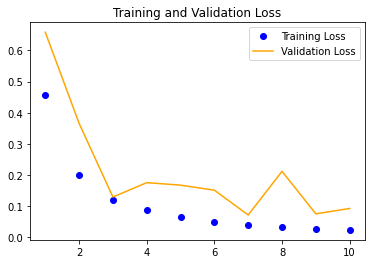

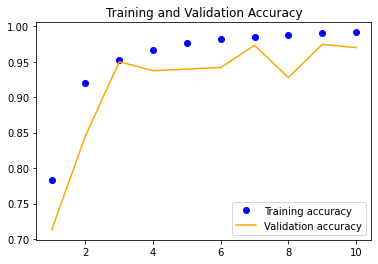

In [33]:
plot_loss(range(1, len(loss) + 1), loss, val_loss)
plot_accuracy(range(1, len(loss) + 1), acc, val_acc)

In [34]:
test_flow = image_gen1.flow_from_directory(
    base_path + 'test/',
    target_size=(224, 224),
    batch_size=1,
    shuffle = False,
    class_mode='binary'
)
y_pred = model.predict(test_flow)
y_test = test_flow.classes

Found 20000 images belonging to 2 classes.


In [35]:
test_flow.class_indices

{'fake': 0, 'real': 1}

In [36]:


print("ROC AUC Score:", metrics.roc_auc_score(y_test, y_pred))
print("AP Score:", metrics.average_precision_score(y_test, y_pred))
print()
print(metrics.classification_report(y_test, y_pred > 0.5))



ROC AUC Score: 0.9973928000000001
AP Score: 0.997246590849053

              precision    recall  f1-score   support

           0       0.99      0.95      0.97     10000
           1       0.95      0.99      0.97     10000

    accuracy                           0.97     20000
   macro avg       0.97      0.97      0.97     20000
weighted avg       0.97      0.97      0.97     20000

